In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Consolidating result files
result_folder = '/cache/dataset/sessions.md.csv/partials/'

arr = []
for root, dirs, files in os.walk(result_folder):
    for filename in files:
        if filename != 'summary.csv':
            arr.append(result_folder + filename)
df = pd.concat([pd.read_csv(f) for f in arr ])
df['full_queries_ratio'] = round(df['query_terms']/df['full_query_terms'], 1)
df.head(5)

,document,candidates,top1_match,top_5_match,top_10_match,pos_1st_match,query_terms,full_query_terms,iteration,term_field,document_field,query_terms_ratio,memory_size,full_queries_ratio
0,11297,194,1,1,1,1,57,79,1,track,user,0.2,8,0.7
1,14829,539,1,1,1,1,6,7,1,track,user,0.2,8,0.9
2,1006640,1,1,1,1,1,11,13,1,track,user,0.2,8,0.8
3,1009632,131,0,1,1,2,36,44,1,track,user,0.2,8,0.8
4,1014744,80,0,0,0,47,28,35,1,track,user,0.2,8,0.8


## Accuracy using Sessions as documents

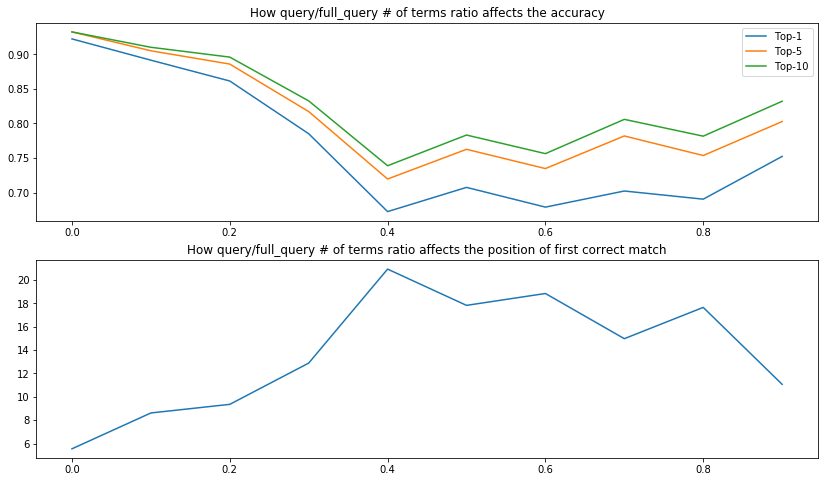

In [11]:
df1 = df[df.document_field=='session']
df1 = df1.groupby(['full_queries_ratio']).mean()

# The picture below shows how the recommendation accuracy is affected according to how 
#   complete/incomplete is our query as compared to its complete version. 
# It demonstrates best accuracy for smaller queries. We also observe how the position of 
#   first correct match is affected by the same measure

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.plot(df1.top1_match, label='Top-1')
plt.plot(df1.top_5_match, label='Top-5')
plt.plot(df1.top_10_match, label='Top-10')
plt.legend()
plt.title('How query/full_query # of terms ratio affects the accuracy')

plt.subplot('212')
plt.plot(df1.pos_1st_match)
plt.title('How query/full_query # of terms ratio affects the position of first correct match')

plt.show()

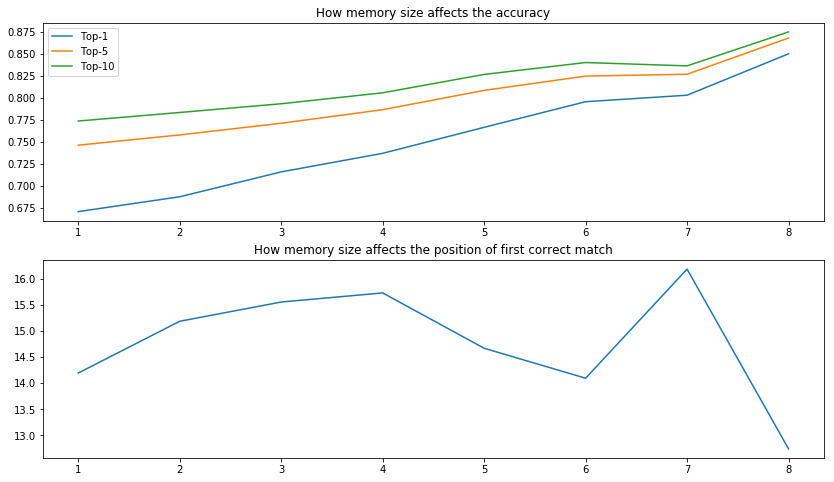

In [12]:
df1 = df[df.document_field=='session']
df1 = df1.groupby(['memory_size']).mean()
df1.head(10)

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.plot(df1.top1_match, label='Top-1')
plt.plot(df1.top_5_match, label='Top-5')
plt.plot(df1.top_10_match, label='Top-10')
plt.legend()
plt.title('How memory size affects the accuracy')

plt.subplot('212')
plt.plot(df1.pos_1st_match)
plt.title('How memory size affects the position of first correct match')

plt.show()

## Accuracy using User as documents

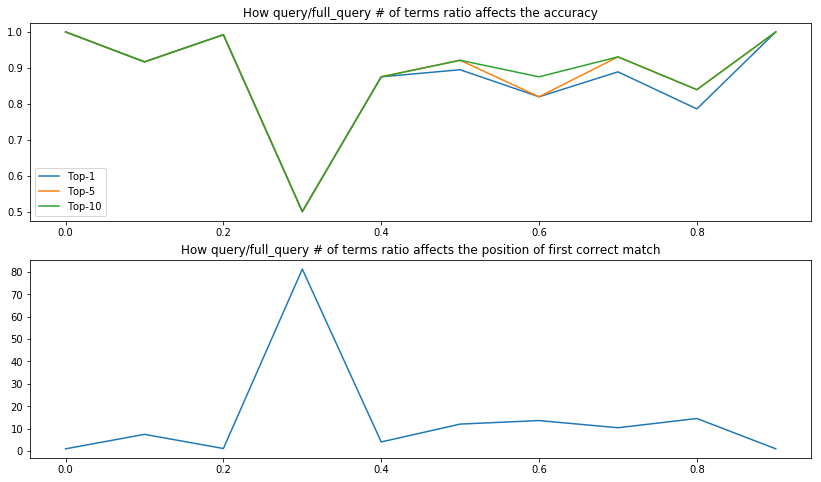

In [13]:
df1 = df[df.document_field=='user']
df1 = df1.groupby(['full_queries_ratio']).mean()

# The picture below shows how the recommendation accuracy is affected according to how 
#   complete/incomplete is our query as compared to its complete version. 
# It demonstrates best accuracy for smaller queries. We also observe how the position of 
#   first correct match is affected by the same measure

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.plot(df1.top1_match, label='Top-1')
plt.plot(df1.top_5_match, label='Top-5')
plt.plot(df1.top_10_match, label='Top-10')
plt.legend()
plt.title('How query/full_query # of terms ratio affects the accuracy')

plt.subplot('212')
plt.plot(df1.pos_1st_match)
plt.title('How query/full_query # of terms ratio affects the position of first correct match')

plt.show()

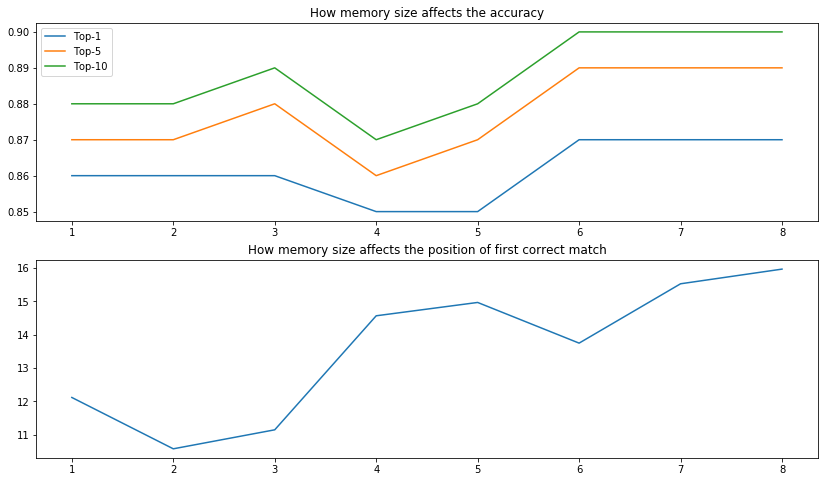

In [14]:
df1 = df[df.document_field=='user']
df1 = df1.groupby(['memory_size']).mean()
df1.head(10)

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.plot(df1.top1_match, label='Top-1')
plt.plot(df1.top_5_match, label='Top-5')
plt.plot(df1.top_10_match, label='Top-10')
plt.legend()
plt.title('How memory size affects the accuracy')

plt.subplot('212')
plt.plot(df1.pos_1st_match)
plt.title('How memory size affects the position of first correct match')

plt.show()

In [15]:
df.groupby(['document_field',  'full_queries_ratio', 'memory_size']).mean()

document  candidates  \
document_field full_queries_ratio memory_size                             
session        0.0                1            4.163587e+05   48.324324   
                                  2            4.163587e+05  113.189189   
                                  3            4.163587e+05  257.621622   
                                  4            4.163587e+05  285.216216   
                                  5            4.163587e+05  134.351351   
                                  6            4.163587e+05  142.891892   
                                  7            4.163587e+05  125.513514   
                                  8            4.163587e+05  279.675676   
               0.1                1            3.894262e+05   49.155650   
                                  2            3.894262e+05   98.038380   
                                  3            3.894262e+05  216.117271   
                                  4            3.894262e+05  250.383795   
                                  5            3.894262e+05  136.014925   
                                  6            3.894262e+05  146.814499   
                                  7            3.894262e+05  131.716418   
                                  8            3.894262e+05  273.850746   
               0.2                1            3.755542e+05   53.271447   
                                  2            3.755542e+05   64.704225   
                                  3            3.755542e+05  155.130602   
                                  4            3.755542e+05  205.749040   
                                  5            3.755542e+05  134.398207   
                                  6            3.755542e+05  151.364917   
                                  7            3.755542e+05  147.431498   
                                  8            3.755542e+05  263.457106   
               0.3                1            3.930040e+05   61.915730   
                                  2            3.930040e+05   63.949438   
                                  3            3.930040e+05  148.353933   
                                  4            3.930040e+05  186.818352   
                                  5            3.930040e+05  146.614232   
                                  6            3.930040e+05  166.651685   
...                                                     ...         ...   
user           0.6                3            1.560582e+06   36.555556   
                                  4            1.560582e+06   37.500000   
                                  5            1.560582e+06   67.388889   
                                  6            1.560582e+06   96.333333   
                                  7            1.560582e+06   96.333333   
                                  8            1.560582e+06  145.055556   
               0.7                1            1.506878e+06   54.111111   
                                  2            1.506878e+06   54.111111   
                                  3            1.506878e+06   54.111111   
                                  4            1.506878e+06   54.111111   
                                  5            1.506878e+06   58.666667   
                                  6            1.506878e+06  118.444444   
                                  7            1.506878e+06  238.000000   
                                  8            1.506878e+06  233.444444   
               0.8                1            1.558420e+06   43.428571   
                                  2            1.558420e+06   43.428571   
                                  3            1.558420e+06   43.428571   
                                  4            1.558420e+06   43.428571   
                                  5            1.558420e+06   44.500000   
                                  6            1.558420e+06   44.500000   
                                  7            1.558420e+06   43.428571   
 